In [ ]:
#@title Runtime operations with TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
#We import relevant modules as
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
#Granularity is the scale or level of detail in a batch of data. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
#We import relevant dataset as
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scaling label.
training_df["median_house_value"] /= 1000.0

# Printing the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:
# Obtaining statistical observations for efficient inference on future dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
#@title Functions that build and train a model

#The functions that build a model-

def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        

#The functions that train a model-

def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [ ]:
#@title Plotting functions

#plot_the_model

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Labelling axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Creating a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Creating a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Rendering the scatter plot and the red line.
  plt.show()

#plot_the_loss_curve

def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 831us/step - loss: 62511.8641 - root_mean_squared_error: 234.6023
Epoch 2/30
567/567 [==============================] - 1s 881us/step - loss: 27381.9386 - root_mean_squared_error: 165.4531
Epoch 3/30
567/567 [==============================] - 1s 883us/step - loss: 26944.0724 - root_mean_squared_error: 164.1345
Epoch 4/30
567/567 [==============================] - 1s 888us/step - loss: 26296.6108 - root_mean_squared_error: 162.1156
Epoch 5/30
567/567 [==============================] - 1s 887us/step - loss: 25514.6378 - root_mean_squared_error: 159.7098
Epoch 6/30
567/567 [==============================] - 0s 873us/step - loss: 25457.1007 - root_mean_squared_error: 159.5396
Epoch 7/30
567/567 [==============================] - 0s 864us/step - loss: 24356.2953 - root_mean_squared_error: 156.0429
Epoch 8/30
567/567 [==============================] - 1s 893us/step - loss: 23721.2943 - root_mean_squared_error: 154.0045
Epoch 9/30
567/5

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


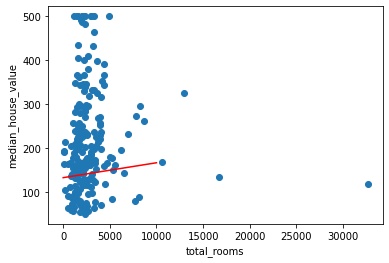

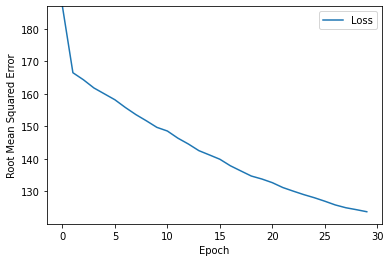

In [ ]:
#@title Plugging hyperparameters

# The following variables are the hyperparameters.

learning_rate = 0.01
epochs = 30
batch_size = 30

# Specifying the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
#We are here creating a model that predicts house value based solely on total_rooms.  

# Discarding any pre-existing version of the model.
my_model = None

# Invoking the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict_house_values(n, feature, label):
  """Prediction of house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             139
 3400     92             144
 3677     69             145
 2202     62             140
 2403     80             140
 5652    295             151
 3318    500             144
 2552    342             141
 1364    118             137
 3468    128             144


Epoch 1/18
5667/5667 [==============================] - 5s 872us/step - loss: 37230.2540 - root_mean_squared_error: 192.2677
Epoch 2/18
5667/5667 [==============================] - 5s 861us/step - loss: 20703.1210 - root_mean_squared_error: 143.8522
Epoch 3/18
5667/5667 [==============================] - 5s 859us/step - loss: 18774.4023 - root_mean_squared_error: 136.9752
Epoch 4/18
5667/5667 [==============================] - 5s 872us/step - loss: 18203.7096 - root_mean_squared_error: 134.8888
Epoch 5/18
5667/5667 [==============================] - 5s 898us/step - loss: 18265.1560 - root_mean_squared_error: 135.1074
Epoch 6/18
5667/5667 [==============================] - 5s 875us/step - loss: 18230.1215 - root_mean_squared_error: 134.9880
Epoch 7/18
5667/5667 [==============================] - 5s 858us/step - loss: 17898.1871 - root_mean_squared_error: 133.7635
Epoch 8/18
5667/5667 [==============================] - 5s 861us/step - loss: 18488.2263 - root_mean_squared_error: 135.9618


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


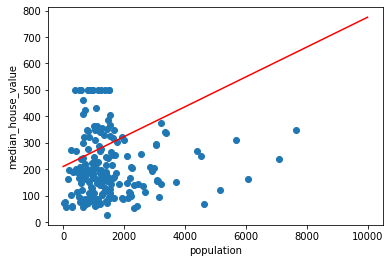

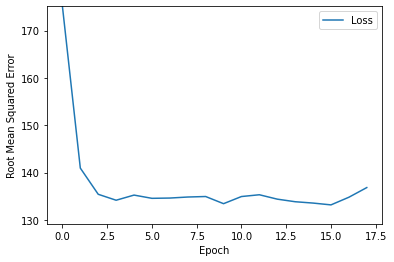

In [ ]:
my_feature = "population" # We choose a feature other than "total_rooms"

# Possibly, we can now experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3


my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             283
 1867     92             316
 2191     69             334
 1052     62             270
 1647     80             303
 2312    295             341
 1604    500             301
 1066    342             270
  338    118             229
 1604    128             301


Epoch 1/24
567/567 [==============================] - 1s 836us/step - loss: 46084.7695 - root_mean_squared_error: 214.3644
Epoch 2/24
567/567 [==============================] - 0s 849us/step - loss: 22147.9479 - root_mean_squared_error: 148.7017
Epoch 3/24
567/567 [==============================] - 0s 851us/step - loss: 15322.5753 - root_mean_squared_error: 123.6572
Epoch 4/24
567/567 [==============================] - 0s 858us/step - loss: 15062.7570 - root_mean_squared_error: 122.6688
Epoch 5/24
567/567 [==============================] - 0s 853us/step - loss: 13448.5955 - root_mean_squared_error: 115.9126
Epoch 6/24
567/567 [==============================] - 0s 847us/step - loss: 15214.6171 - root_mean_squared_error: 123.2543
Epoch 7/24
567/567 [==============================] - 1s 886us/step - loss: 13692.5091 - root_mean_squared_error: 116.9571
Epoch 8/24
567/567 [==============================] - 0s 855us/step - loss: 15064.4414 - root_mean_squared_error: 122.6277
Epoch 9/24
567/5

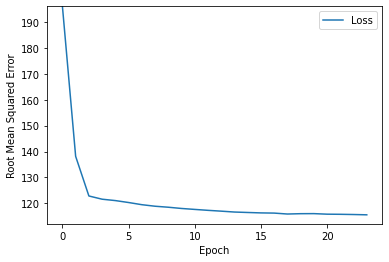

In [ ]:
#@title  Synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tuning the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30


my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)

In [ ]:
predict_house_values(15, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             199
    2     69             194
    2     62             210
    1     80             185
    2    295             223
    2    500             209
    2    342             221
    4    118             285
    2    128             212
    2    187             222
    3     80             232
    2    112             223
    2     95             217
    2     69             209


In [ ]:
# @title Correlation matrix
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/18
5667/5667 [==============================] - 5s 895us/step - loss: 18689.2228 - root_mean_squared_error: 131.7987
Epoch 2/18
5667/5667 [==============================] - 5s 853us/step - loss: 7109.3223 - root_mean_squared_error: 84.2723
Epoch 3/18
5667/5667 [==============================] - 5s 867us/step - loss: 6959.0162 - root_mean_squared_error: 83.4052
Epoch 4/18
5667/5667 [==============================] - 5s 859us/step - loss: 7061.9060 - root_mean_squared_error: 84.0239
Epoch 5/18
5667/5667 [==============================] - 5s 848us/step - loss: 7075.8132 - root_mean_squared_error: 84.0817
Epoch 6/18
5667/5667 [==============================] - 5s 859us/step - loss: 7092.9166 - root_mean_squared_error: 84.2109
Epoch 7/18
5667/5667 [==============================] - 5s 873us/step - loss: 7123.3701 - root_mean_squared_error: 84.3810
Epoch 8/18
5667/5667 [==============================] - 5s 888us/step - loss: 7302.1072 - root_mean_squared_error: 85.4282
Epoch 9/18
566

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


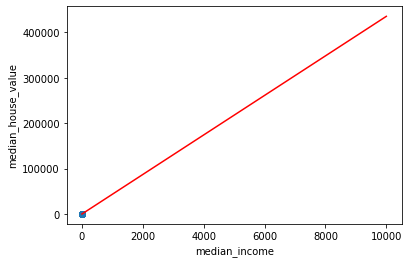

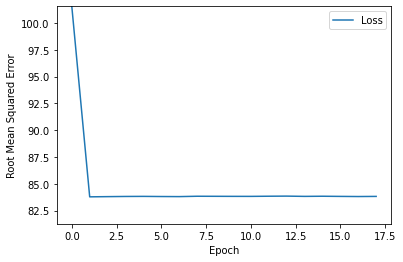

In [ ]:
#@title Use of correlation matrix to get optimised convergence in model
my_feature = "median_income" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             132
    4     92             212
    3     69             153
    2     62             130
    3     80             152
    2    295             146
   10    500             464
    5    342             262
    2    118             145
    4    128             222
